In [104]:
pip install seaborn


In [105]:
!pip install pandas matplotlib


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [107]:
df=pd.read_csv("Expanded_data_with_more_features.csv")

In [108]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [109]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [111]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [112]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [113]:
df.duplicated().sum()

np.int64(0)

In [114]:
df.fillna(0,inplace=True)

GENDER DISTRIBUTION IN SCHOOL

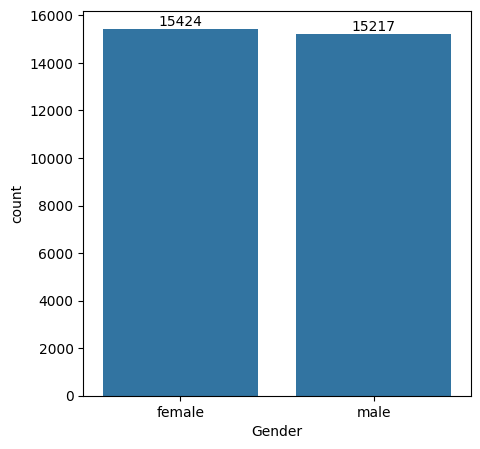

In [115]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Gender",data=df)
ax.bar_label(ax.containers[0])
plt.show()

from the above chart we can clearly see that females are more in school than males

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


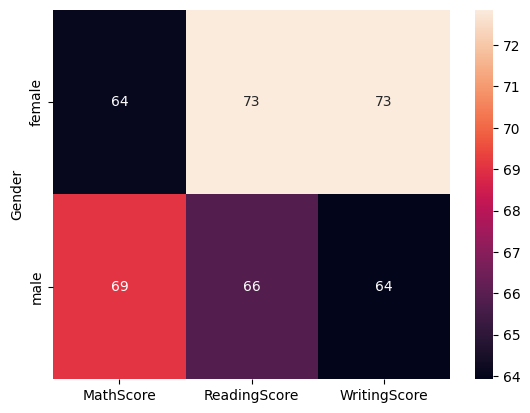

In [116]:
ghh=df.groupby("Gender").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(ghh)

sns.heatmap(ghh,annot=True)
plt.show()


THIS SHOWS BOYS SCORES MORE THAN GIRLS IN MATHS

PARENT EDUCATION IMPACT ON CHILDRENS SCORE

In [117]:
# Replace "0" with "not_educated" in the "ParentEduc" column and update the column
df["ParentEduc"] = df["ParentEduc"].str.replace("0","not_educated")

gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)
df["ParentEduc"].value_counts()

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


,count
ParentEduc,
some college,6633
high school,5687
associate's degree,5550
some high school,5517
bachelor's degree,3386
master's degree,2023


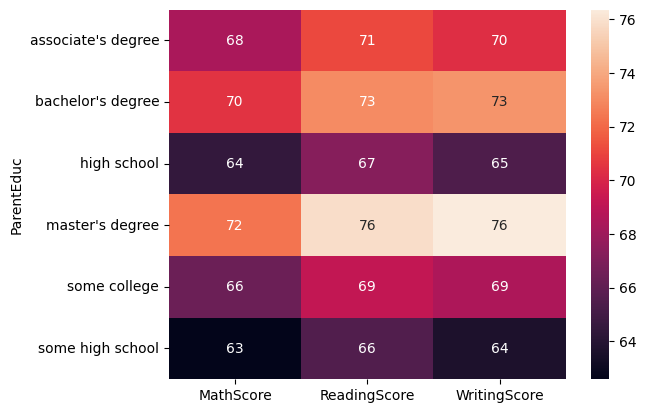

In [118]:
sns.heatmap(gb,annot=True)
plt.show()

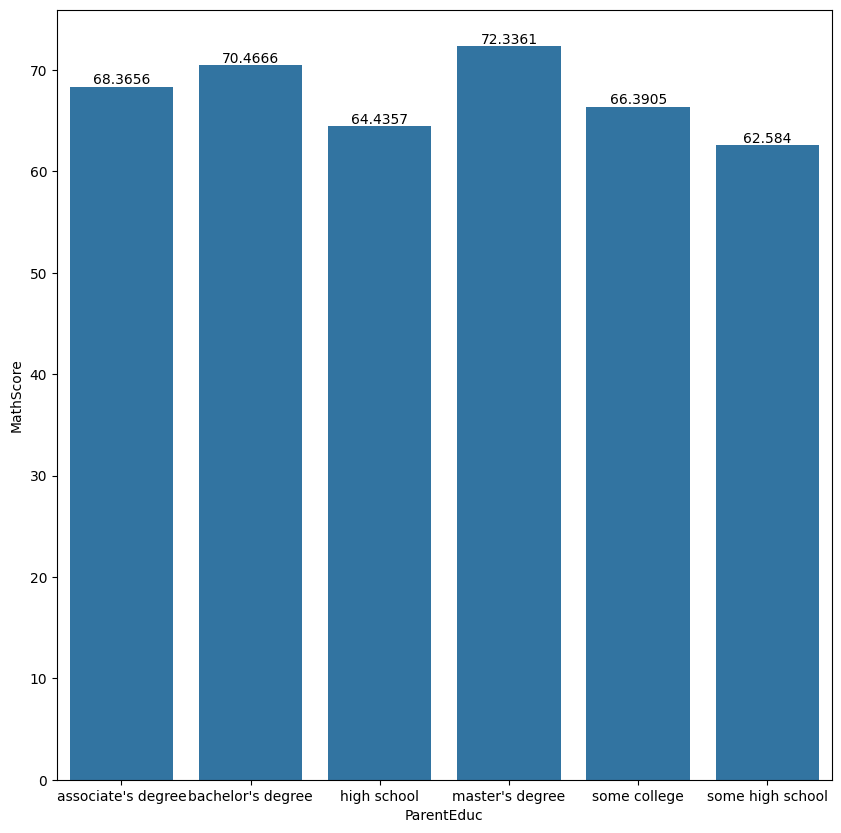

In [119]:
plt.figure(figsize=(10,10))
b=sns.barplot(x=gb.index,y=gb["MathScore"])
b.bar_label(b.containers[0])

plt.show()

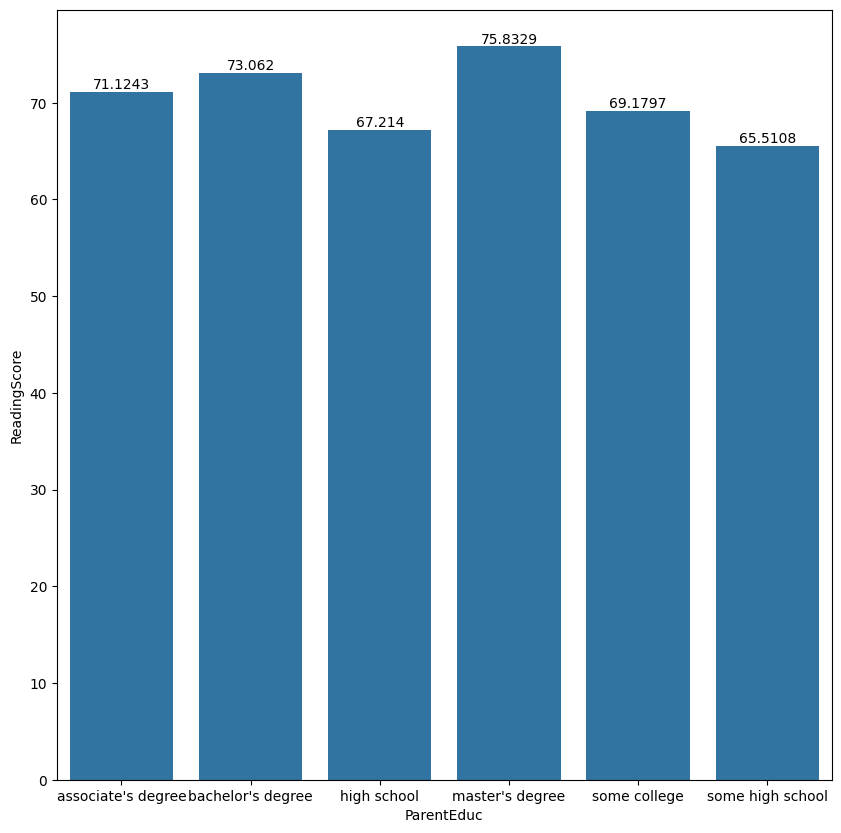

In [120]:
plt.figure(figsize=(10,10))
b=sns.barplot(x=gb.index,y=gb["ReadingScore"])
b.bar_label(b.containers[0])

plt.show()

WE CAN CLEARLY SEE THE IMPACT OF PARENTS EDUC ON STUDENTS MARKS

In [121]:
df['EthnicGroup']=df['EthnicGroup'].str.replace("0","NO GROUP")

In [122]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,0,married,sometimes,yes,0.0,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [123]:

# The .str.replace() method on a pandas Series does not support the 'inplace' argument.
# It returns a new Series with the replacements.
# We need to assign the result back to the column.
df['ParentMaritalStatus'] = df['ParentMaritalStatus'].str.replace("0", "not_married")




In [124]:
ds=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

print(ds)





                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


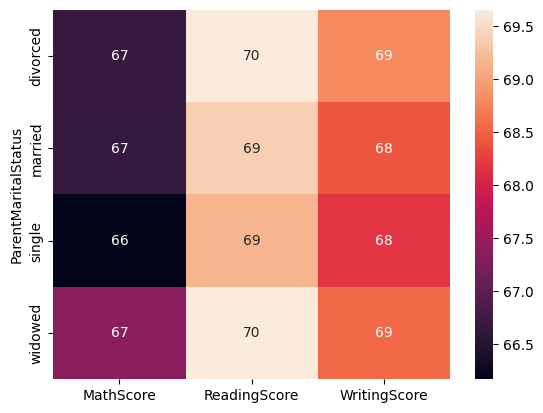

In [125]:
hm=sns.heatmap(ds,annot=True)
plt.show()

BY THE ABOVE CHART OR DIAGRAM WE CAN SAY THAT ParentMaritalStatus DOES NOT AFFECT THE SCORES OF STUDENTS

In [126]:
dn=df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

print(dn)


            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.654069     69.438265     68.525231
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


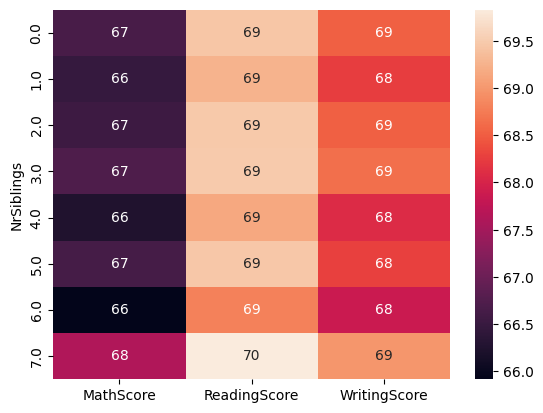

In [127]:
jk=sns.heatmap(dn,annot=True)
plt.show()

we can clearly see there was no major effect on marks

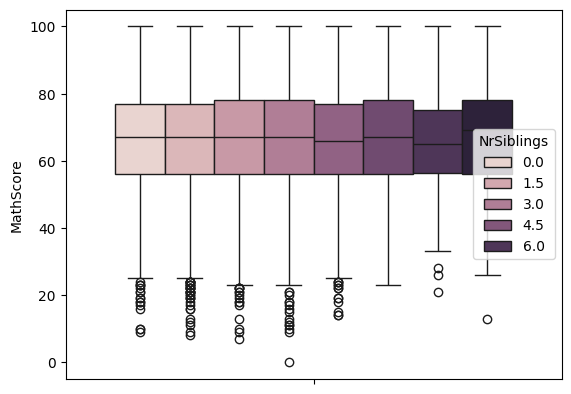

In [128]:
sns.boxplot(y="MathScore",data=df,hue="NrSiblings")
plt.show()

its shows that no of outliers decreses with increase in simblings

<Axes: >

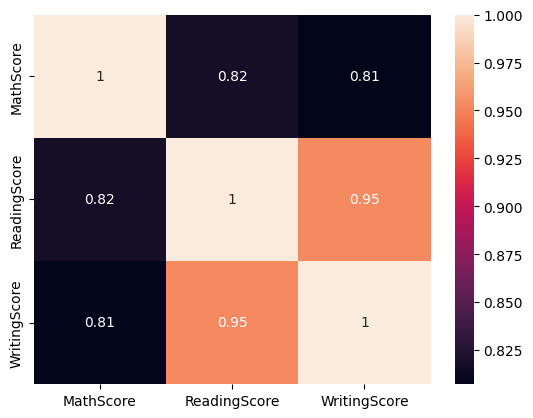

In [129]:
sns.heatmap(df[['MathScore', 'ReadingScore', 'WritingScore']].corr(), annot=True)


This plot helps answer:

“If a student scores high in reading, is it likely they’ll also score high in writing?